In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
data=pd.read_csv('Company_Data.csv')

In [67]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [68]:
data[data['Sales'].duplicated().sort_values(ascending=True)].sort_values(by=['Sales'],ascending=True)

/tmp/ipykernel_4993/2701235551.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Sales'].duplicated().sort_values(ascending=True)].sort_values(by=['Sales'],ascending=True)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,3.47,108,38,0,251,81,Bad,72,14,No,No
381,3.90,124,65,21,496,151,Bad,77,13,Yes,Yes
202,4.10,121,78,4,413,130,Bad,46,10,No,Yes
224,4.10,134,82,0,464,141,Medium,48,13,No,No
83,4.42,109,36,7,468,94,Bad,56,11,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
329,11.27,100,54,9,433,89,Good,45,12,Yes,Yes
169,11.48,104,41,15,492,77,Good,73,18,Yes,Yes
325,11.70,144,69,11,131,104,Medium,47,11,Yes,Yes
171,12.49,93,106,12,416,55,Medium,75,15,Yes,Yes


In [69]:
X=data.drop('Sales',axis=1)
y=data["Sales"]

In [70]:
data.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [71]:
#Encoding- Label Encoding should be suitable here as we dont need to define different variables and increase the space complexity of the features though
#we can argue that ShelveLoc can be used as OHE variable

# Define features that need encoding
categorical_features = ['ShelveLoc','Urban','US']



In [72]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [73]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer



# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OrdinalEncoder(), categorical_features),
    ],
    remainder='passthrough'  
)

X_transformed=preprocessor.fit_transform(X[categorical_features])

In [74]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [75]:
#To perform Binning on the Target Varible i.e Sales Either we can do is a frequency based or an Equal size based binning, best option is to use a standard Optimal libraray for this job.
X_transformed=pd.DataFrame(X_transformed,columns=categorical_features)
X_transformed
# ShelveLoc->     Bad=0 | Good=1 | Medium=2
# Urban->    Yes=1  | No=0
# US->       Yes=1  | No=0


,ShelveLoc,Urban,US
0,0.0,1.0,1.0
1,1.0,1.0,1.0
2,2.0,1.0,1.0
3,2.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
395,1.0,1.0,1.0
396,2.0,0.0,1.0
397,2.0,1.0,1.0
398,0.0,1.0,1.0


In [76]:
X.drop(columns=categorical_features,axis=1,inplace=True)
X=X.assign(**X_transformed)


In [77]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,138,73,11,276,120,42,17,0.0,1.0,1.0
1,111,48,16,260,83,65,10,1.0,1.0,1.0
2,113,35,10,269,80,59,12,2.0,1.0,1.0
3,117,100,4,466,97,55,14,2.0,1.0,1.0
4,141,64,3,340,128,38,13,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1.0,1.0,1.0
396,139,23,3,37,120,55,11,2.0,0.0,1.0
397,162,26,12,368,159,40,18,2.0,1.0,1.0
398,100,79,7,284,95,50,12,0.0,1.0,1.0


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

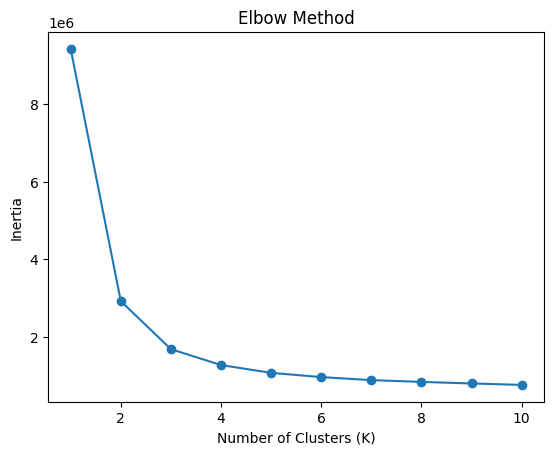

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [93]:
from sklearn.cluster import KMeans

K=3
kmeans = KMeans(n_clusters=K)
data['Kmeans_bins'] = kmeans.fit_predict(data[['Sales']])


/home/gm/Desktop/Code/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
result = data.groupby('Kmeans_bins')['Sales'].agg(['min', 'max']).sort_values(by='min',ascending=True)

In [95]:
#Result of binning out Dependent variable we can make it contuous by considering the values of all the min 
result 

,min,max
Kmeans_bins,,
2,0.00,6.23
1,6.37,9.71
0,9.95,16.27


In [96]:
#We can use stratified sampling to remove bias during train test split
data.Kmeans_bins.value_counts()

Kmeans_bins
1    178
2    142
0     80
Name: count, dtype: int64

In [101]:
# now lets create a Dicision Tree accordingly after the preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,data.Kmeans_bins,stratify=data.Kmeans_bins,random_state=42,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)


array([[-0.7586034 , -0.23555126,  0.65215259,  0.19524251,  0.56811472,
         0.16190003,  0.84219413, -0.33031395, -1.53896753,  0.71374643],
       [ 0.07037698, -0.88317666,  0.9535083 , -0.6722218 ,  0.30043858,
         0.59363343,  1.60673916, -0.33031395,  0.64978629,  0.71374643],
       [ 0.55394887,  1.23959551,  0.9535083 , -1.5800333 ,  1.23730506,
         1.39542404,  1.22446665,  0.87082768, -1.53896753,  0.71374643],
       [-1.93299228, -1.71069802,  0.65215259,  0.44405011, -1.17178018,
         1.39542404, -1.06916844, -1.53145557, -1.53896753,  0.71374643],
       [-1.2421753 , -1.53080207, -1.00530382,  0.99546154, -1.03794211,
         0.16190003,  0.0776491 ,  0.87082768, -1.53896753, -1.4010578 ],
       [ 0.41578547, -1.35090612, -1.00530382,  0.45077464,  0.6573401 ,
         1.39542404,  0.84219413,  0.87082768,  0.64978629, -1.4010578 ],
       [ 1.72833775,  0.52001172, -0.40259239,  0.43732558,  1.01424162,
        -1.56503359,  1.22446665, -0.33031395

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.55      0.64      0.59        36
           2       0.64      0.57      0.60        28

    accuracy                           0.59        80
   macro avg       0.60      0.57      0.58        80
weighted avg       0.59      0.59      0.59        80



In [103]:
#Binning Using Kmeans clusters gave us F1 score aroung 63% and equal number of false positives and negatives
y_test

234    1
296    1
54     2
209    2
192    1
      ..
155    1
97     1
304    0
256    2
327    2
Name: Kmeans_bins, Length: 80, dtype: int32

In [104]:
target=data.Sales.copy()
from sklearn.preprocessing import KBinsDiscretizer

# Assuming 'target' is your target variable
target = target.values.reshape(-1, 1)

# Create an instance of KBinsDiscretizer
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Fit and transform the target variable
target_binned = kbd.fit_transform(target)

# Flatten the result if needed
target_binned = target_binned.flatten()




In [105]:
data['Kbins_Discritizer']=target_binned

In [106]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Kmeans_bins,Kbins_Discritizer
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,3.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,4.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,4.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1,2.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,0,4.0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,2,1.0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,1,2.0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,2,1.0


In [107]:
# now lets create a Dicision Tree accordingly after the preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,data.Kbins_Discritizer,stratify=data.Kbins_Discritizer,random_state=42,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)


array([[ 1.7964852 ,  1.72725555, -1.01804435, -0.63912198,  1.87951826,
        -0.91424043,  0.79527307,  0.83222202,  0.66930098, -1.39132305],
       [-0.57250627, -1.01649723, -1.01804435, -1.28148505, -0.78155963,
         1.40913512,  0.41258528,  0.83222202, -1.49409613, -1.39132305],
       [ 1.99390116,  0.42758318, -1.01804435, -0.19080609,  0.35890232,
        -1.0398283 ,  0.02989748,  0.83222202,  0.66930098, -1.39132305],
       [ 0.15135223,  0.86080731, -1.01804435,  1.62253133, -1.03499562,
         0.15325644,  1.56064866,  0.83222202,  0.66930098, -1.39132305],
       [ 1.59906925,  0.03046107,  1.97758041,  0.67236929,  0.78129564,
         0.40443218, -0.35279031, -0.37280534,  0.66930098,  0.71874034],
       [ 0.34876819,  1.14962339, -1.01804435,  0.27089237,  1.28816762,
        -0.72585863, -1.1181659 , -0.37280534,  0.66930098, -1.39132305],
       [ 0.61198947, -1.55802738,  0.47976803, -0.19080609,  1.37264628,
         0.34163825, -0.35279031,  0.83222202

In [108]:
#Now lets check the accuracy with this binning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.36
Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.56      0.55        16
         1.0       0.30      0.38      0.33        16
         2.0       0.27      0.19      0.22        16
         3.0       0.27      0.38      0.32        16
         4.0       0.50      0.31      0.38        16

    accuracy                           0.36        80
   macro avg       0.37      0.36      0.36        80
weighted avg       0.37      0.36      0.36        80



In [109]:
#In between both of them best binning would give us a 63% accuracy so we take the bins of Kmeans i.e
result


,min,max
Kmeans_bins,,
2,0.00,6.23
1,6.37,9.71
0,9.95,16.27
